In [43]:
import pandas as pd
import numpy as np

#загружаем и смотрим
data = pd.read_csv('assignment_1.csv')    
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
dist = data.groupby(['Transported', 'Destination']).size().unstack().fillna(0)
dist  # не влияет 

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Transported,,,
False,702,395,3128
True,1098,401,2787


In [46]:
dist = data.groupby(['Transported', 'HomePlanet']).size().unstack().fillna(0)
dist  # не влияет 

HomePlanet,Earth,Europa,Mars
Transported,,,
False,2651,727,839
True,1951,1404,920


оставляем признаки: крио-сон, кабина(потом разделяю(с учётом палубы и стороны) и конечный результат.
так как это самые важные признаки 
остальные не несут смысловой нагрузки на выживаемость
как и VIP ибо зона не автономна и не изолированна 
это следует из условия 

In [47]:
# Разбиваем столбец Cabin 
data['Deck'] = data['Cabin'].str.split('/').str.get(0)
data['Side'] = data['Cabin'].str.split('/').str.get(2)
data = data.drop(columns=['Cabin'])
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [48]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Side            199
dtype: int64

In [49]:
#подготавливаем данные 
data = data.fillna(data.mode().iloc[0])  # Для категориальных признаков (заполняем часто встречаемыми)
data.head()
#числовые признаки отложим, так как эти столбцы в дальнейшем сотрем 

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [50]:
data.isna().sum() #ПРОВЕРКА

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Side            0
dtype: int64

In [51]:
#удаляем ненужные столбцы
data = data.drop(columns=['PassengerId', 'Name', 'HomePlanet','Destination', 'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name'])
data.head()

,CryoSleep,Transported,Deck,Side
0,False,False,B,P
1,False,True,F,S
2,False,False,A,S
3,False,False,A,S
4,False,True,F,S


In [52]:
# Кодируем категориальные признаки, в числовой формат
# data = pd.get_dummies(data, columns=['Deck', 'Side'])
data = pd.get_dummies(data, drop_first=True)
data.head()

,CryoSleep,Transported,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,False,False,1,0,0,0,0,0,0,0
1,False,True,0,0,0,0,1,0,0,1
2,False,False,0,0,0,0,0,0,0,1
3,False,False,0,0,0,0,0,0,0,1
4,False,True,0,0,0,0,1,0,0,1


In [53]:
#разделение
X=data.drop(columns=['Transported'])
y=data['Transported']
from sklearn.model_selection import train_test_split
#размеры выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [65]:
#обучение модели
from sklearn import tree
#ограничиваем максимальную глубину дерева
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.718558282208589
Precision: 0.7726001863932899
Recall: 0.6285064442759667
F1-score: 0.6931438127090301


[Text(0.5131578947368421, 0.9, 'x[0] <= 0.5\ngini = 0.5\nsamples = 6085\nvalue = [3026, 3059]'),
 Text(0.2631578947368421, 0.7, 'x[8] <= 0.5\ngini = 0.447\nsamples = 4005\nvalue = [2654, 1351]'),
 Text(0.15789473684210525, 0.5, 'x[2] <= 0.5\ngini = 0.405\nsamples = 1994\nvalue = [1431, 563]'),
 Text(0.10526315789473684, 0.3, 'x[1] <= 0.5\ngini = 0.401\nsamples = 1842\nvalue = [1331, 511]'),
 Text(0.05263157894736842, 0.1, 'gini = 0.397\nsamples = 1723\nvalue = [1253, 470]'),
 Text(0.15789473684210525, 0.1, 'gini = 0.452\nsamples = 119\nvalue = [78, 41]'),
 Text(0.21052631578947367, 0.3, 'gini = 0.45\nsamples = 152\nvalue = [100, 52]'),
 Text(0.3684210526315789, 0.5, 'x[2] <= 0.5\ngini = 0.477\nsamples = 2011\nvalue = [1223, 788]'),
 Text(0.3157894736842105, 0.3, 'x[1] <= 0.5\ngini = 0.465\nsamples = 1836\nvalue = [1161, 675]'),
 Text(0.2631578947368421, 0.1, 'gini = 0.456\nsamples = 1694\nvalue = [1097, 597]'),
 Text(0.3684210526315789, 0.1, 'gini = 0.495\nsamples = 142\nvalue = [64, 7

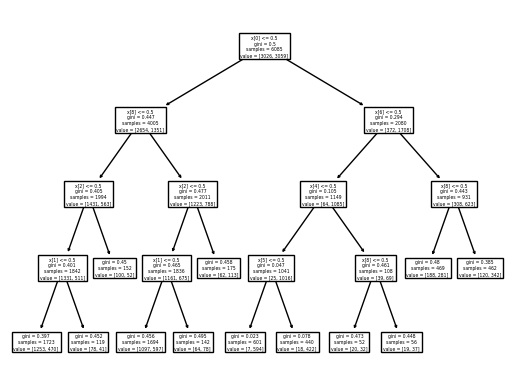

In [66]:
tree.plot_tree(clf) 